to be split into respective notebooks

In [1]:
import xarray
import rioxarray
import geopandas
import rasterstats
import numpy as np
import pandas as pd
import glob

## Medellin

In [2]:
medellin = geopandas.read_parquet("../../urbangrammar_samba/sp_sig_concept/medellin/tessellation.pq")
r = rioxarray.open_rasterio("../../urbangrammar_samba/sp_sig_concept/ghs_composite_s2/S2_percentile_30_UTM_557-0000000000-0000023296_osgb.tif")

In [3]:
medellin.crs.equals(r.rio.crs)

True

In [4]:
clipped = r.rio.clip_box(*medellin.total_bounds)
masked = clipped.where(clipped != 0)

In [5]:
ndvi = (masked.sel(band=4) - masked.sel(band=1)) / (masked.sel(band=4) + masked.sel(band=1))

In [6]:
ndvi.min(), ndvi.max()

(<xarray.DataArray ()>
 array(-0.45150774)
 Coordinates:
     spatial_ref  int64 0,
 <xarray.DataArray ()>
 array(0.84324537)
 Coordinates:
     spatial_ref  int64 0)

In [7]:
affine = ndvi.rio.transform()

In [10]:
%%time
stats = rasterstats.zonal_stats(
    medellin.geometry, 
    raster=ndvi.values,
    affine=affine,
    stats=['mean'],
    all_touched=True,
    nodata = np.nan,
)

CPU times: user 8min 27s, sys: 19.3 s, total: 8min 46s
Wall time: 8min 46s


In [11]:
medellin['ndvi'] = [x["mean"] for x in stats]

In [12]:
medellin[["tID", "ndvi"]].to_parquet("../../urbangrammar_samba/sp_sig_concept/medellin/ndvi.pq")

<AxesSubplot:>

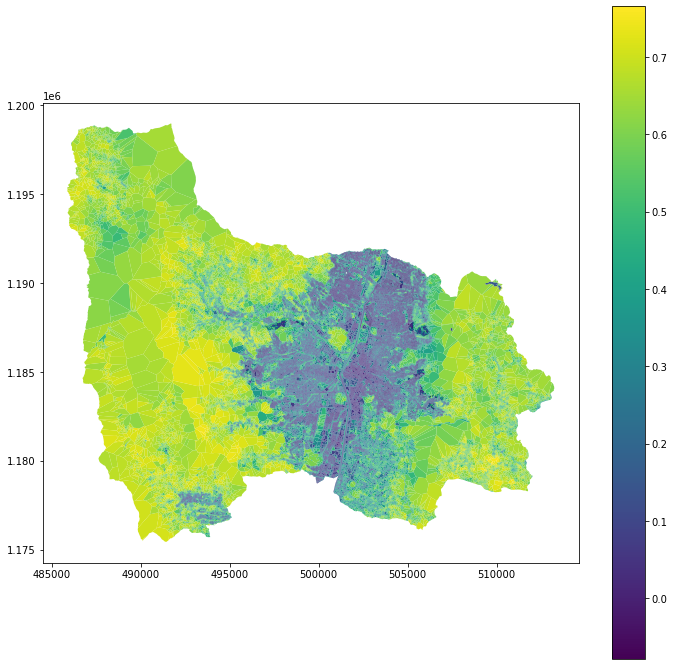

In [13]:
medellin.plot('ndvi', legend=True, figsize=(12, 12))

## Dar es Salaam

In [14]:
dar_es_salaam = geopandas.read_parquet("../../urbangrammar_samba/sp_sig_concept/dar_es_salaam/tessellation.pq")
r = rioxarray.open_rasterio("../../urbangrammar_samba/sp_sig_concept/ghs_composite_s2/S2_percentile_UTM_636-0000069888-0000023296_osgb.tif")

In [15]:
dar_es_salaam.crs.equals(r.rio.crs)

True

In [16]:
clipped = r.rio.clip_box(*dar_es_salaam.total_bounds)
masked = clipped.where(clipped != 0)

In [17]:
ndvi = (masked.sel(band=4) - masked.sel(band=1)) / (masked.sel(band=4) + masked.sel(band=1))

In [18]:
ndvi.min(), ndvi.max()

(<xarray.DataArray ()>
 array(-0.66080225)
 Coordinates:
     spatial_ref  int64 0,
 <xarray.DataArray ()>
 array(0.85430464)
 Coordinates:
     spatial_ref  int64 0)

In [19]:
affine = ndvi.rio.transform()

In [20]:
%%time
stats = rasterstats.zonal_stats(
    dar_es_salaam.geometry, 
    raster=ndvi.values,
    affine=affine,
    stats=['mean'],
    all_touched=True,
    nodata = np.nan,
)

CPU times: user 28min 54s, sys: 1min 7s, total: 30min 1s
Wall time: 30min 1s


In [21]:
dar_es_salaam['ndvi'] = [x["mean"] for x in stats]

In [23]:
dar_es_salaam

,uID,geometry,eID,ndvi
0,784070.0,"POLYGON ((530753.667 -751662.183, 530753.915 -...",0,0.137347
1,785052.0,"POLYGON ((530753.915 -751662.504, 530753.667 -...",0,0.230215
2,785854.0,"POLYGON ((530710.355 -751642.103, 530709.850 -...",0,0.277036
3,786074.0,"POLYGON ((530709.663 -751625.639, 530708.164 -...",0,0.389978
4,786327.0,"POLYGON ((530744.095 -751637.861, 530744.095 -...",0,0.372431
...,...,...,...,...
1168891,NaN,"POLYGON ((531621.072 -756221.064, 531623.115 -...",19920,0.413103
1168892,NaN,"POLYGON ((531623.115 -756235.533, 531621.072 -...",19921,0.470519
1168893,NaN,"POLYGON ((531617.995 -756192.298, 531621.072 -...",19922,0.498046
1168894,NaN,"POLYGON ((531621.072 -756221.064, 531617.995 -...",19923,0.492762


In [24]:
dar_es_salaam[["ndvi"]].to_parquet("../../urbangrammar_samba/sp_sig_concept/dar_es_salaam/ndvi.pq")

<AxesSubplot:>

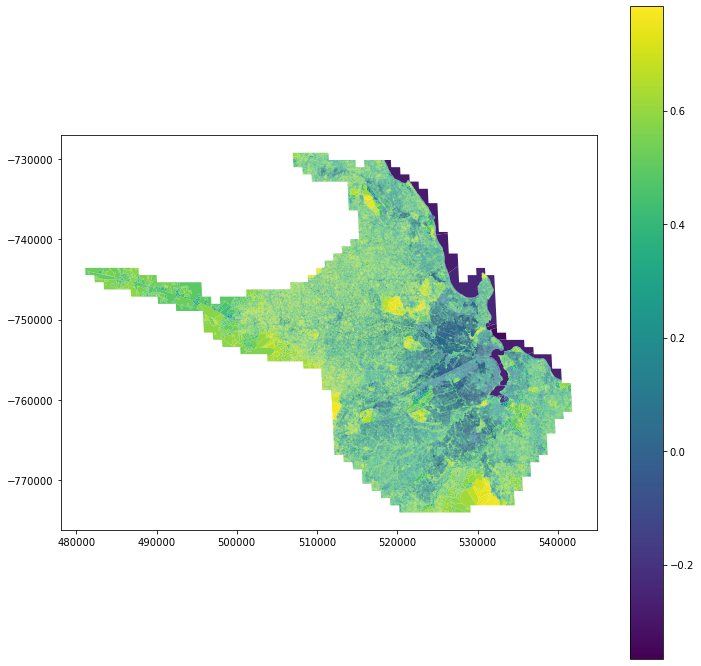

In [25]:
dar_es_salaam.plot('ndvi', legend=True, figsize=(12, 12))

## Houston

In [2]:
chunks = glob.glob("../../urbangrammar_samba/sp_sig_concept/houston/chunked/chunk_*.pq")

In [ ]:
for chunk in chunks:
    houston = geopandas.read_parquet(chunk, columns=["tID", "tessellation"])
    r = rioxarray.open_rasterio("../../urbangrammar_samba/sp_sig_concept/ghs_composite_s2/S2_houston_clipped_proj.tif")
    clipped = r.rio.clip_box(*houston.total_bounds)
    masked = clipped.where(clipped != 0)
    ndvi = (masked.sel(band=4) - masked.sel(band=1)) / (masked.sel(band=4) + masked.sel(band=1))
    affine = ndvi.rio.transform()
    stats = rasterstats.zonal_stats(
        houston.geometry, 
        raster=ndvi.values,
        affine=affine,
        stats=['mean'],
        all_touched=True,
        nodata = np.nan,
    )
    houston['ndvi'] = [x["mean"] for x in stats]
    houston[["tID", "ndvi"]].to_parquet(f"../../urbangrammar_samba/sp_sig_concept/houston/ndvi/ndvi{chunk[62:-3]}.pq")
    print(f"Chunk {chunk[62:-3]} processed.")

Chunk 16 processed.
Chunk 32 processed.
Chunk 3 processed.
Chunk 29 processed.
Chunk 45 processed.
Chunk 38 processed.
Chunk 8 processed.
Chunk 36 processed.
Chunk 2 processed.
Chunk 28 processed.
Chunk 24 processed.
Chunk 9 processed.
Chunk 15 processed.
Chunk 21 processed.
Chunk 22 processed.
Chunk 30 processed.
Chunk 10 processed.
Chunk 37 processed.
Chunk 11 processed.
Chunk 17 processed.
Chunk 25 processed.
Chunk 18 processed.
Chunk 26 processed.
Chunk 43 processed.
Chunk 31 processed.
Chunk 33 processed.
Chunk 39 processed.
Chunk 19 processed.
Chunk 27 processed.
